# Univariate Nonlinear Transformations

__Import libraries__

In [2]:
# essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

# dataset
from sklearn.datasets import load_boston

# preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ML algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

- Adding squared or cubed features can help linear models for regression.
- We can tranform features by applying mathematical functions.
- Linear models and neural networks are very tied to the scale and distribution of each feature, if there is no linear relationship, the data becomes hard to model.
- The function log and exp can help by adjusting the relative scales in the data so that they can be captured better by a linear model or neural network. Sin and cos functions can come handy when dealing with data that encodes periodic patterns.
- A particularly common case when such a transformation can be helpful is when dealing with integet count data.

In [3]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [4]:
print("Number of feature apperances:\n{}".format(np.bincount(X[:, 0])))

Number of feature apperances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


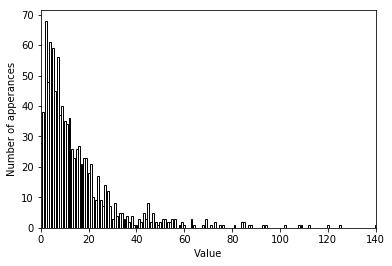

In [12]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='w', edgecolor='k')
plt.ylabel('Number of apperances')
plt.xlabel('Value')
plt.xlim(0, np.max(X[:, 0]));

This kind of distribution is very common in practice. However it is something most linear models can't handle very well.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


Low R2 score, we can see that ridge can not capture the data very well, applying a logarithmic transformation can help.

In [15]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

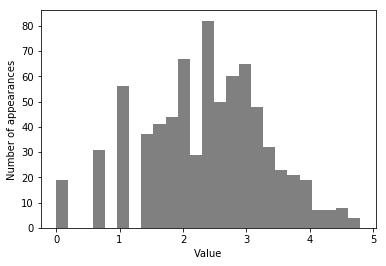

In [17]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel('Number of appearances')
plt.xlabel('Value');

The data have changed into more normally distributed.

In [18]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


- Finding the proper transformation is kind of an art.
- Mostly not all features need to be transformed. Probably just some of it and we need to know about the distribution in some features to find the right transformation.
- These kind of transformations are irrelevant for tree-based models but might essential for linear models. It is also a good idea to transform the target vector.
- Transformation of feature matrix will have a great effect on models like linear models and naive bayes models.
- SVMs, nearest neighbors, and neural networks might sometimes benefit from using binning, interactions, or polynomials.